## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [9]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 51s 1ms/step - loss: 2.3039 - accuracy: 0.1019 - val_loss: 2.3044 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 52s 1ms/step - loss: 2.3042 - accuracy: 0.0991 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 52s 1ms/step - loss: 2.3042 - accuracy: 0.0974 - val_loss: 2.3033 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________________________

50000/50000 [==============================] - 52s 1ms/step - loss: 0.4139 - accuracy: 0.8500 - val_loss: 2.3362 - val_accuracy: 0.5069
Epoch 47/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4170 - accuracy: 0.8491 - val_loss: 2.1604 - val_accuracy: 0.5257
Epoch 48/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.4007 - accuracy: 0.8543 - val_loss: 2.2703 - val_accuracy: 0.5163
Epoch 49/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.3978 - accuracy: 0.8571 - val_loss: 2.2604 - val_accuracy: 0.5152
Epoch 50/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.3707 - accuracy: 0.8651 - val_loss: 2.2793 - val_accuracy: 0.5234
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________________________

50000/50000 [==============================] - 50s 1ms/step - loss: 0.9495 - accuracy: 0.6667 - val_loss: 1.3598 - val_accuracy: 0.5341
Epoch 45/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9375 - accuracy: 0.6697 - val_loss: 1.3815 - val_accuracy: 0.5280
Epoch 46/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9228 - accuracy: 0.6775 - val_loss: 1.5547 - val_accuracy: 0.4885
Epoch 47/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.9135 - accuracy: 0.6788 - val_loss: 1.3544 - val_accuracy: 0.5388
Epoch 48/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.9035 - accuracy: 0.6826 - val_loss: 1.5123 - val_accuracy: 0.5040
Epoch 49/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8851 - accuracy: 0.6908 - val_loss: 1.3803 - val_accuracy: 0.5314
Epoch 50/50
50000/50000 [==============================] - 51s 1ms/step - loss: 0.8831 - accuracy: 0.6895 - val_loss: 1.4415

50000/50000 [==============================] - 65s 1ms/step - loss: 1.5967 - accuracy: 0.4413 - val_loss: 1.6069 - val_accuracy: 0.4373
Epoch 42/50
50000/50000 [==============================] - 85s 2ms/step - loss: 1.5925 - accuracy: 0.4418 - val_loss: 1.6012 - val_accuracy: 0.4398
Epoch 43/50
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5877 - accuracy: 0.4450 - val_loss: 1.6000 - val_accuracy: 0.4367
Epoch 44/50
50000/50000 [==============================] - 49s 975us/step - loss: 1.5834 - accuracy: 0.4451 - val_loss: 1.5926 - val_accuracy: 0.4391
Epoch 45/50
50000/50000 [==============================] - 49s 984us/step - loss: 1.5789 - accuracy: 0.4491 - val_loss: 1.5914 - val_accuracy: 0.4402
Epoch 46/50
50000/50000 [==============================] - 49s 975us/step - loss: 1.5749 - accuracy: 0.4499 - val_loss: 1.5856 - val_accuracy: 0.4421
Epoch 47/50
50000/50000 [==============================] - 49s 983us/step - loss: 1.5706 - accuracy: 0.4510 - val_loss

50000/50000 [==============================] - 58s 1ms/step - loss: 1.9730 - accuracy: 0.3174 - val_loss: 1.9719 - val_accuracy: 0.3201
Epoch 40/50
50000/50000 [==============================] - 49s 979us/step - loss: 1.9688 - accuracy: 0.3201 - val_loss: 1.9676 - val_accuracy: 0.3210
Epoch 41/50
50000/50000 [==============================] - 49s 976us/step - loss: 1.9645 - accuracy: 0.3215 - val_loss: 1.9636 - val_accuracy: 0.3224
Epoch 42/50
50000/50000 [==============================] - 49s 977us/step - loss: 1.9605 - accuracy: 0.3228 - val_loss: 1.9597 - val_accuracy: 0.3249
Epoch 43/50
50000/50000 [==============================] - 49s 976us/step - loss: 1.9565 - accuracy: 0.3239 - val_loss: 1.9558 - val_accuracy: 0.3255
Epoch 44/50
50000/50000 [==============================] - 49s 983us/step - loss: 1.9527 - accuracy: 0.3260 - val_loss: 1.9520 - val_accuracy: 0.3270
Epoch 45/50
50000/50000 [==============================] - 49s 978us/step - loss: 1.9490 - accuracy: 0.3271 - val_

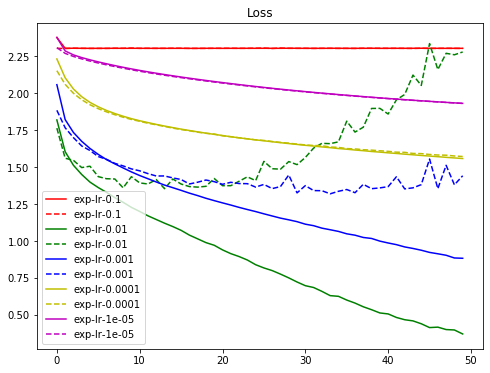

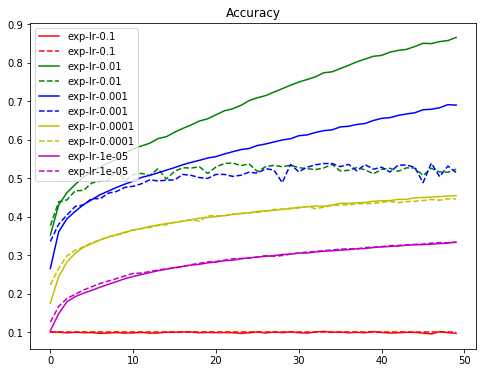

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()